In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
iris = datasets.load_iris()
irispetals = pd.DataFrame(iris['data'][:, (2,3)], columns=('petallength', 'petalwidth'))
irispetals['target'] = iris['target']
irispetals

,petallength,petalwidth,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


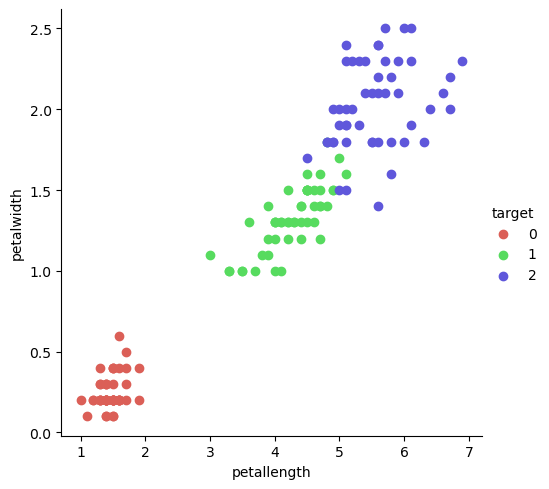

In [12]:
sns.FacetGrid(data=irispetals, hue='target', palette='hls', height=5) \
    .map(plt.scatter, 'petallength', 'petalwidth').add_legend()

## Model Building

In [13]:
X = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

In [14]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Create a Pipeline with Standard Scaler and LinearSVC Objects

In [15]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
    
])

svm_clf.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

#### Predictions

In [18]:
print(svm_clf.predict([[5.17, 1.7]]))
print(svm_clf.predict([[4.4, 1.2]]))
print(svm_clf.predict([[2.1, 0.4]]))
print(svm_clf.predict([[4.8, 0.2]]))

[1.]
[0.]
[0.]
[0.]


# Non Linear Classification

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X,y = datasets.make_moons(n_samples=100, noise=0.1)

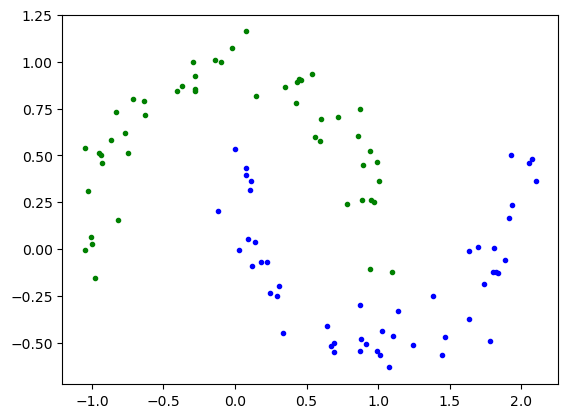

In [33]:
plt.plot(X[:,0][y==1], X[:,1][y==1], 'b.')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'g.')
plt.show()

### insert Polynomial Degree 3

In [34]:
poly_svc_clf = Pipeline([
    ('poly_featues', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

poly_svc_clf.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_featues', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

#### predictions

In [35]:
print(poly_svc_clf.predict([[0.5, -0.6]]))
print(poly_svc_clf.predict([[0.6, 1]]))
print(poly_svc_clf.predict([[1.7, 0.75]]))
print(poly_svc_clf.predict([[0.8, 0.2]]))

[1]
[0]
[0]
[0]


### Using Kernel Trick

In [36]:
from sklearn.svm import SVC

poly_kernal_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', coef0=1, C=5))
])

poly_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

###### predictions

In [37]:
print(poly_svc_clf.predict([[0.5, -0.6]]))
print(poly_svc_clf.predict([[0.6, 1]]))
print(poly_svc_clf.predict([[1.7, 0.75]]))
print(poly_svc_clf.predict([[0.8, 0.2]]))

[1]
[0]
[0]
[0]
